## Import and Examine Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_csv('../Data/mnist_train.csv')
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
dg=df.copy()              #create a copy 
dg['pixel0'][0] = None    #set one value to null
print(dg.isnull().values.any())  #check for null values
print(df.isnull().values.any())

True
False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
l = df['label']
d = df.drop("label",axis=1)

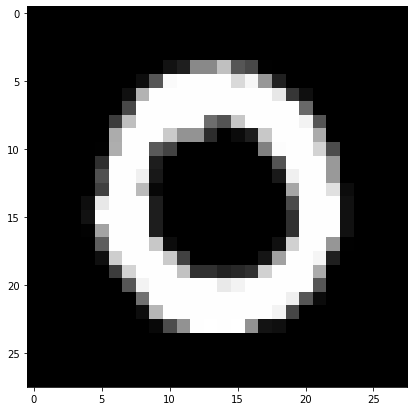

In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
i=1
grid_data = d.iloc[i].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

In [6]:
labels = l.head(10000)
data = d.head(10000)

data.shape

the shape of sample data =  (10000, 784)


## Visualization using PCA

In [7]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(data)
std_data.shape

print(np.mean(std_data[:,232]))
print(np.std(std_data[:,232]))

(10000, 784)

In [9]:
covar_matrix = np.matmul(std_data.T , std_data)/std_data.shape[0] # covar_matrix =A^T * A
covar_matrix.shape

(784, 784)

In [10]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783)) #to generate only the top 2 eigenvalues and vectors
vectors.shape

(784, 2)

In [11]:
new_data = np.matmul(std_data, vectors)  #feature reduction
new_data.shape

(10000, 2)

In [14]:
new_data=np.vstack((new_data.T,labels)).T
new_data.shape

(10000, 3)

In [15]:
dataframe = pd.DataFrame(data=new_data, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.448069      -4.949725    1.0
1       6.833972      18.966372    0.0
2      -2.051008      -7.527935    1.0
3       5.555069      -0.715448    4.0
4       7.291958      26.253689    0.0


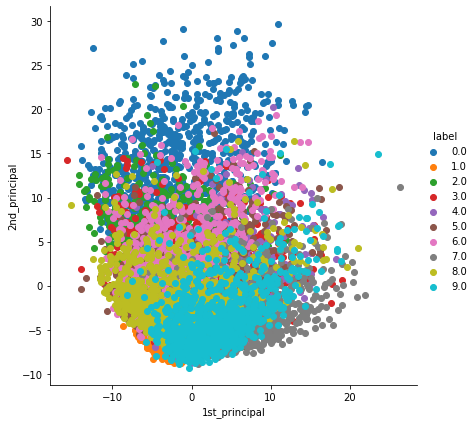

In [98]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### PCA  using Scikit learn 

In [96]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(std_data)

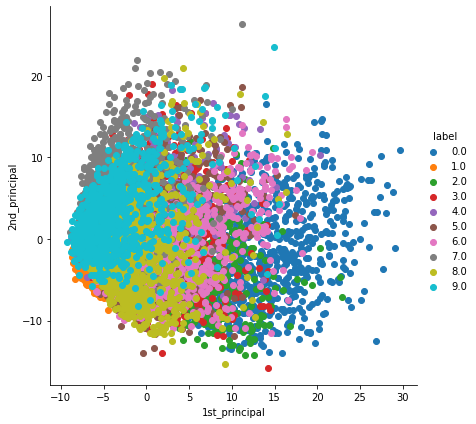

In [97]:
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

The 1st principal and 2nd_principal component in the last two figuares are exchanged. Otherwise, the visualization produces the same result.

## PCA for dimensionality  reduction

In [21]:
pca.n_components =784
pca_data =pca.fit_transform(std_data)

percentage_variance = pca.explained_variance_/np.sum(pca.explained_variance_)

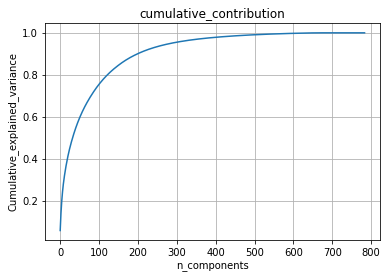

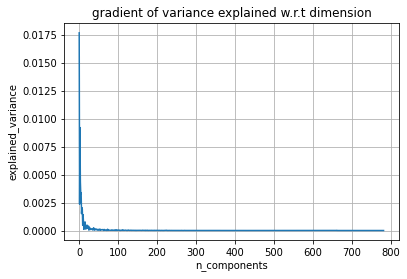

In [77]:
cum_variance =np.cumsum(percentage_variance)
plt.plot(cum_variance)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('cumulative_contribution')
plt.show()

gradient_variance=np.negative(np.diff(percentage_variance))
plt.plot(gradient_variance)
plt.title('gradient of variance explained w.r.t dimension')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_gradient')
plt.show()


print(gradient_variance.argmin(),gradient_variance.min()) #The no_of_component in which the change per increase in
print(cum_variance[gradient_variance.argmin()+1])         #no_of_components is minimum and the respective explained
                                                          #variance

The optimal value for n_components=691 because the gradient is minimum at 690 at which cumulative variance is  99.99%. However, 690 is still large dimension and may suffer curse of dimensionality.

In [87]:
print(cum_variance[200])
print(cum_variance[100])

0.9012479654052304
0.755642603810887
0.637150109719583


At n_components=200, 90% of variance is explained.Similarly, 75% variance is explained at n_components=100.

## TSNE for dimensionality reduction
- best dimension reduction for  nd -> md , m < n (PCA is basic)
- DL based method, current state of the art
                                

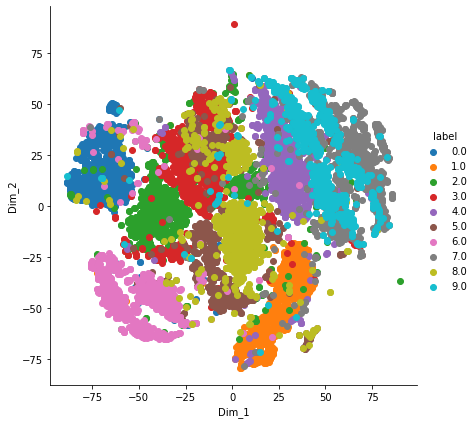

In [99]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2, random_state=0)
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data =model.fit_transform(std_data)
tsne_data.shape

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()

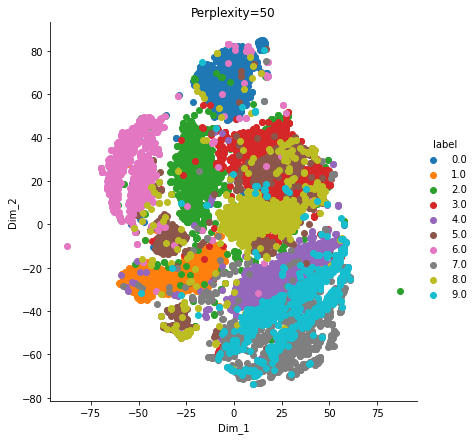

In [100]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2, random_state=0 , perplexity=50)

tsne_data =model.fit_transform(std_data)

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('Perplexity=50')
plt.show()

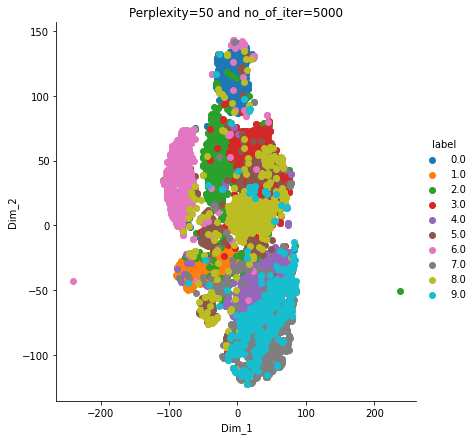

In [102]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2, random_state=0 , perplexity=50, n_iter=5000)

tsne_data =model.fit_transform(std_data)

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('Perplexity=50 and no_of_iter=5000')
plt.show()

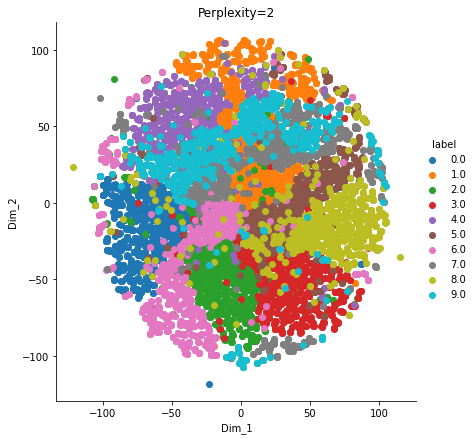

In [103]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2, random_state=0 , perplexity=2)

tsne_data =model.fit_transform(std_data)

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('Perplexity=2')
plt.show()